# Non-linear Regression Demo

_Source: 🤖[Homemade Machine Learning](https://github.com/trekhleb/homemade-machine-learning) repository_

> ☝Before moving on with this demo you might want to take a look at:
> - 📗[Math behind the Linear Regression](https://github.com/trekhleb/homemade-machine-learning/tree/master/homemade/linear_regression)
> - ⚙️[Linear Regression Source Code](https://github.com/trekhleb/homemade-machine-learning/blob/master/homemade/linear_regression/linear_regression.py)

**Polynomial regression** is a form of regression analysis in which the relationship between the independent variable `x` and the dependent variable `y` is modelled as an _n<sup>th<sup>_ degree polynomial in `x`. Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function `E(y|x)` is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.

> **Demo Project:** In this example we will train our model to imitate an artificial non-linear equation.

In [1]:
# To make debugging of linear_regression module easier we enable imported modules autoreloading feature.
# By doing this you may change the code of linear_regression library and all these changes will be available here.
%load_ext autoreload
%autoreload 2

# Add project root folder to module loading paths.
import sys
sys.path.append('../..')

### Import Dependencies

- [pandas](https://pandas.pydata.org/) - library that we will use for loading and displaying the data in a table
- [numpy](http://www.numpy.org/) - library that we will use for linear algebra operations
- [matplotlib](https://matplotlib.org/) - library that we will use for plotting the data
- [linear_regression](https://github.com/trekhleb/homemade-machine-learning/blob/master/src/linear_regression/linear_regression.py) - custom implementation of linear regression

In [2]:
# Import 3rd party dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import custom linear regression implementation.
from homemade.linear_regression import LinearRegression

### Load the Data

In this demo we will use artificial non-linear data set.

In [3]:
# Load the data.
data = pd.read_csv('../../data/non-linear-regression-x-y.csv')

# Fetch traingin set and labels.
x = data['x'].values.reshape((data.shape[0], 1))
y = data['y'].values.reshape((data.shape[0], 1))

# Print the data table.
data.head(10)

,y,x
0,97.58776,1.0
1,97.76344,2.0
2,96.56705,3.0
3,92.52037,4.0
4,91.15097,5.0
5,95.21728,6.0
6,90.21355,7.0
7,89.29235,8.0
8,91.51479,9.0
9,89.60966,10.0


### Plot the Data

Let's visualize the training and test datasets to see the shape of the data.

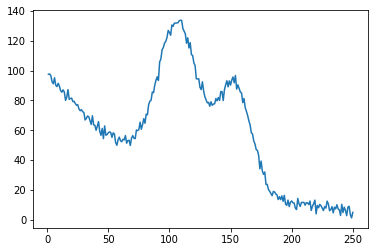

In [4]:
plt.plot(x, y)
plt.show()

### Init and Train Linear Regression Model

> ☝🏻This is the place where you might want to play with model configuration.

- `polynomial_degree` - this parameter will allow you to add additional polynomial features of certain degree. More features - more curved the line will be.
- `num_iterations` - this is the number of iterations that gradient descent algorithm will use to find the minimum of a cost function. Low numbers may prevent gradient descent from reaching the minimum. High numbers will make the algorithm work longer without improving its accuracy.
- `learning_rate` - this is the size of the gradient descent step. Small learning step will make algorithm work longer and will probably require more iterations to reach the minimum of the cost function. Big learning steps may couse missing the minimum and growth of the cost function value with new iterations.
- `regularization_param` - parameter that will fight overfitting. The higher the parameter, the simplier is the model will be.
- `polynomial_degree` - the degree of additional polynomial features (`x1^2 * x2, x1^2 * x2^2, ...`). This will allow you to curve the predictions.
- `sinusoid_degree` - the degree of sinusoid parameter multipliers of additional features (`sin(x), sin(2*x), ...`). This will allow you to curve the predictions by adding sinusoidal component to the prediction curve.

In [5]:
# Set up linear regression parameters.
num_iterations = 50000  # Number of gradient descent iterations.
regularization_param = 0  # Helps to fight model overfitting.
learning_rate = 0.02  # The size of the gradient descent step.
polynomial_degree = 15  # The degree of additional polynomial features.
sinusoid_degree = 15  # The degree of sinusoid parameter multipliers of additional features.
normalize_data = True  # Flag that indicates that data needs to be normalized before training.

# Init linear regression instance.
linear_regression = LinearRegression(x, y, polynomial_degree, sinusoid_degree, normalize_data)

# Train linear regression.
(theta, cost_history) = linear_regression.train(
    learning_rate,
    regularization_param,
    num_iterations
)

# Print training results.
print('Initial cost: {:.2f}'.format(cost_history[0]))
print('Optimized cost: {:.2f}'.format(cost_history[-1]))

# Print model parameters
theta_table = pd.DataFrame({'Model Parameters': theta.flatten()})
theta_table

Initial cost: 142682024.61
Optimized cost: 2189909.14


,Model Parameters
0,60.531874
1,47.084018
2,-11.632109
3,-14.402426
4,-7.773803
5,-0.102871
6,0.670168
7,-3.557618
8,-4.976602
9,-2.276354


### Analyze Gradient Descent Progress

The plot below illustrates how the cost function value changes over each iteration. You should see it decreasing. 

In case if cost function value increases it may mean that gradient descent missed the cost function minimum and with each step it goes further away from it. In this case you might want to reduce the learning rate parameter (the size of the gradient step).

From this plot you may also get an understanding of how many iterations you need to get an optimal value of the cost function. In current example you may see that there is no much sense to increase the number of gradient descent iterations over 500 since it will not reduce cost function significantly.  

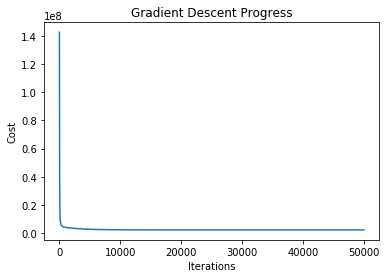

In [6]:
# Plot gradient descent progress.
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Progress')
plt.show()

### Plot the Model Predictions

Since our model is trained now we may plot its predictions over the training and test datasets to see how well it fits the data.

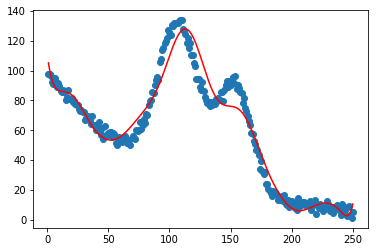

In [7]:
# Get model predictions for the trainint set.
predictions_num = 1000
x_predictions = np.linspace(x.min(), x.max(), predictions_num).reshape(predictions_num, 1);
y_predictions = linear_regression.predict(x_predictions)

# Plot training data with predictions.
plt.scatter(x, y, label='Training Dataset')
plt.plot(x_predictions, y_predictions, 'r', label='Prediction')
plt.show()

You may see from the plot how well our model predicts the training set examples.